# Replikacija rezultata

In [1]:
import pandas as pd
import numpy as np

Učitavanje prethodno očišćenih podataka

In [2]:
X = pd.read_csv("clean_data.csv")

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                563 non-null    int64  
 1   radius_mean              563 non-null    float64
 2   texture_mean             563 non-null    float64
 3   perimeter_mean           563 non-null    float64
 4   area_mean                563 non-null    float64
 5   smoothness_mean          563 non-null    float64
 6   compactness_mean         563 non-null    float64
 7   concavity_mean           563 non-null    float64
 8   concave points_mean      563 non-null    float64
 9   symmetry_mean            563 non-null    float64
 10  radius_se                563 non-null    float64
 11  perimeter_se             563 non-null    float64
 12  area_se                  563 non-null    float64
 13  smoothness_se            563 non-null    float64
 14  compactness_se           5

In [4]:
y = X['diagnosis']

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
558    1
559    1
560    1
561    1
562    0
Name: diagnosis, Length: 563, dtype: int64

In [6]:
X.drop(['diagnosis'], axis=1, inplace=True)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
559,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
560,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
561,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Podjela skupa podataka na skup za treniranje i skup za testiranje u omjeru 75:25

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(422, 27)
(422,)
(141, 27)
(141,)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Inicijalizacija polja za spremanje točnosti različitih algoritama (potrebno za ispis tablice na kraju)

In [10]:
train_accuracies = []
test_accuracies = []

## Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.957345971563981
Testing accuracy: 0.9432624113475178


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


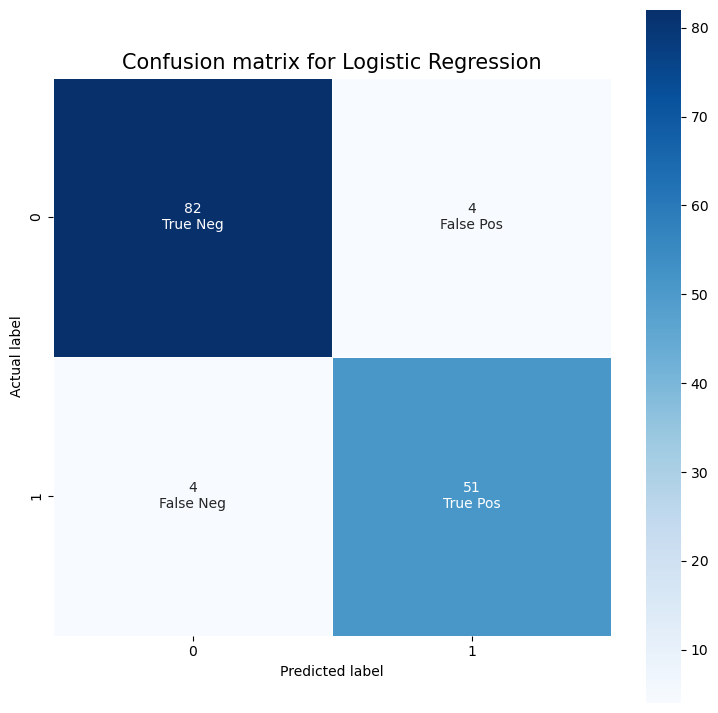

In [13]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
group_counts = ["{0:0.0f}\n{1}".format(value, name) for value, name in zip(confusion_matrix.flatten(), group_names)]
labels = np.asarray(group_counts).reshape(2, 2)

plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix, annot=labels, fmt='', linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion matrix for Logistic Regression'
plt.title(all_sample_title, size=15)

plt.show()

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Precision score: " + str(precision))
print("Recall score: " + str(recall))
print("F1 score: " + str(f1))

Precision score: 0.9272727272727272
Recall score: 0.9272727272727272
F1 score: 0.9272727272727272


Precision - accuracy of positive predictions\
Recall - ability to capture all positive instances\
F1 - provides a balance between precision and recall\
These scores will be calculated for every used algorithm.

In [15]:
train_accuracies.append(accuracy_score(y_train, y_pred_train))
test_accuracies.append(accuracy_score(y_test, y_pred_test))

## SVM (Support vector machine)

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.9123222748815166
Testing accuracy: 0.8865248226950354


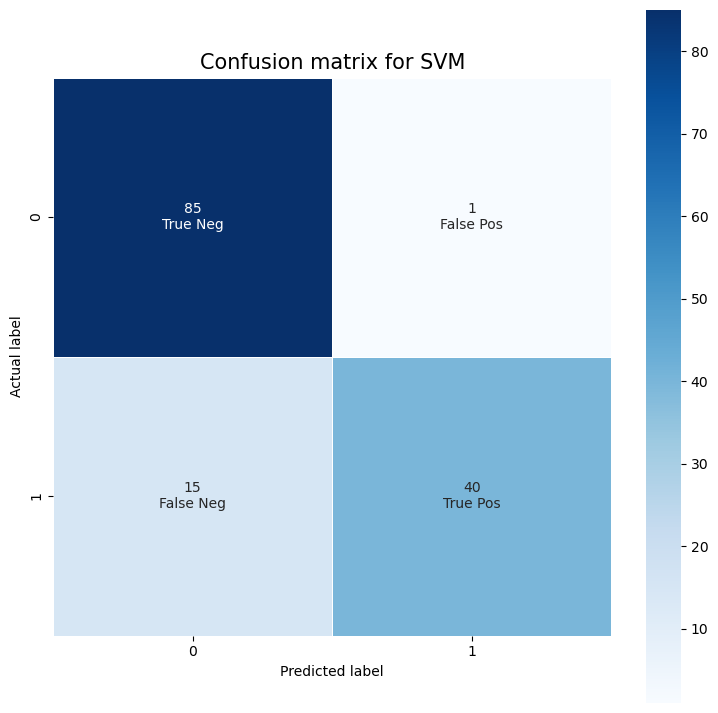

In [18]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
group_counts = ["{0:0.0f}\n{1}".format(value, name) for value, name in zip(confusion_matrix.flatten(), group_names)]
labels = np.asarray(group_counts).reshape(2, 2)

plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix, annot=labels, fmt='', linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion matrix for SVM'
plt.title(all_sample_title, size=15)

plt.show()

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Precision score: " + str(precision))
print("Recall score: " + str(recall))
print("F1 score: " + str(f1))

Precision score: 0.975609756097561
Recall score: 0.7272727272727273
F1 score: 0.8333333333333334


In [20]:
train_accuracies.append(accuracy_score(y_train, y_pred_train))
test_accuracies.append(accuracy_score(y_test, y_pred_test))

## Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
randfor = RandomForestClassifier()
randfor.fit(X_train, y_train)
y_pred_train = randfor.predict(X_train)
y_pred_test = randfor.predict(X_test)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 1.0
Testing accuracy: 0.950354609929078


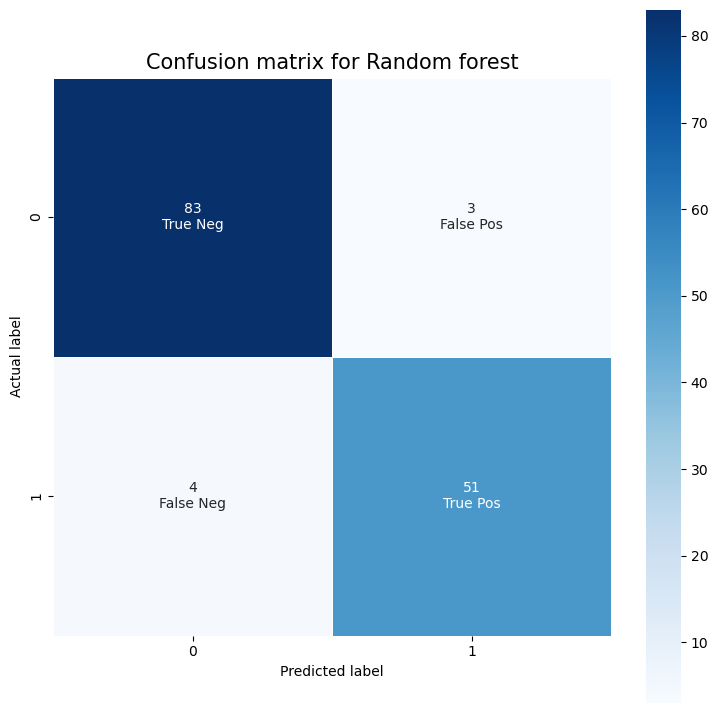

In [23]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
group_counts = ["{0:0.0f}\n{1}".format(value, name) for value, name in zip(confusion_matrix.flatten(), group_names)]
labels = np.asarray(group_counts).reshape(2, 2)

plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix, annot=labels, fmt='', linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion matrix for Random forest'
plt.title(all_sample_title, size=15)

plt.show()

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Precision score: " + str(precision))
print("Recall score: " + str(recall))
print("F1 score: " + str(f1))

Precision score: 0.9444444444444444
Recall score: 0.9272727272727272
F1 score: 0.9357798165137615


In [25]:
train_accuracies.append(accuracy_score(y_train, y_pred_train))
test_accuracies.append(accuracy_score(y_test, y_pred_test))

## Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))


Training accuracy: 0.9454976303317536
Testing accuracy: 0.9432624113475178


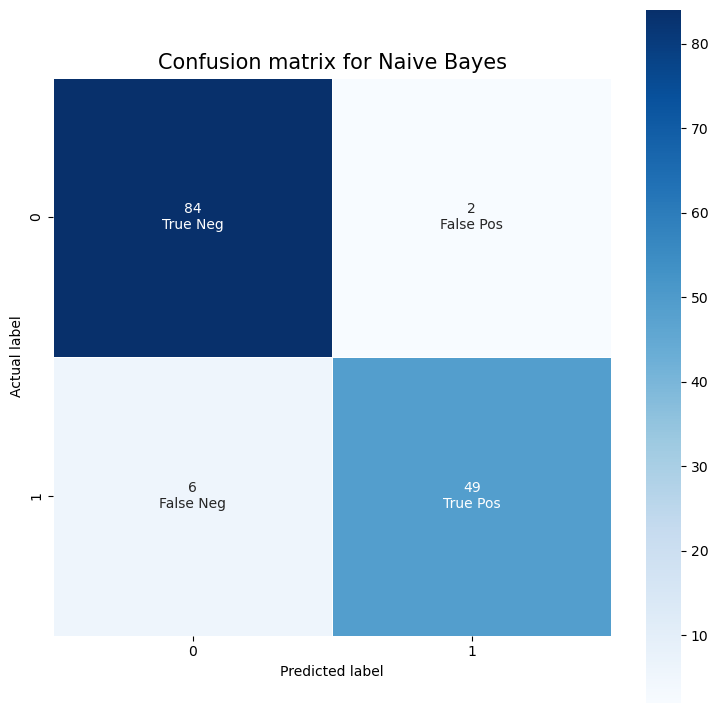

In [28]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
group_counts = ["{0:0.0f}\n{1}".format(value, name) for value, name in zip(confusion_matrix.flatten(), group_names)]
labels = np.asarray(group_counts).reshape(2, 2)

plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix, annot=labels, fmt='', linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion matrix for Naive Bayes'
plt.title(all_sample_title, size=15)

plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Precision score: " + str(precision))
print("Recall score: " + str(recall))
print("F1 score: " + str(f1))

Precision score: 0.9607843137254902
Recall score: 0.8909090909090909
F1 score: 0.9245283018867925


In [30]:
train_accuracies.append(accuracy_score(y_train, y_pred_train))
test_accuracies.append(accuracy_score(y_test, y_pred_test))

## Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

y_pred_train = dectree.predict(X_train)
y_pred_test = dectree.predict(X_test)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 1.0
Testing accuracy: 0.950354609929078


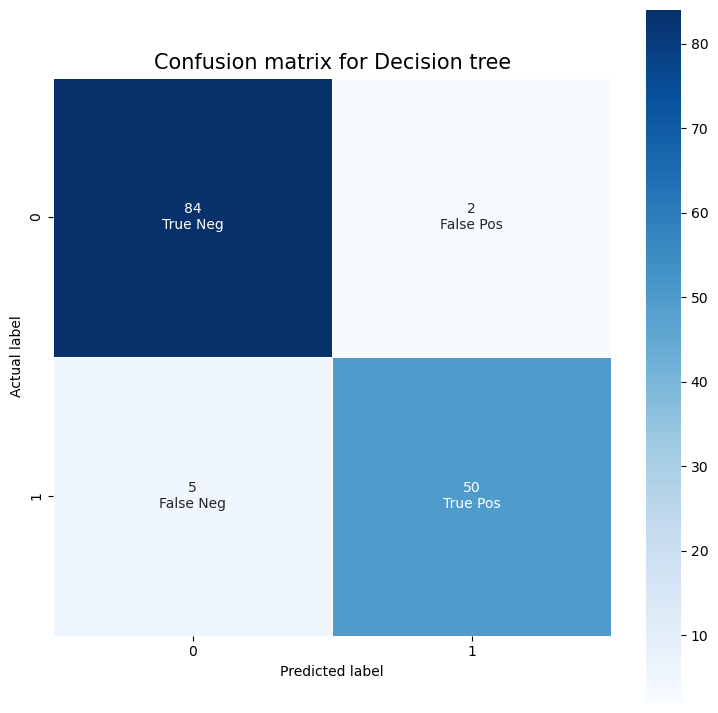

In [33]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
group_counts = ["{0:0.0f}\n{1}".format(value, name) for value, name in zip(confusion_matrix.flatten(), group_names)]
labels = np.asarray(group_counts).reshape(2, 2)

plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix, annot=labels, fmt='', linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion matrix for Decision tree'
plt.title(all_sample_title, size=15)

plt.show()

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Precision score: " + str(precision))
print("Recall score: " + str(recall))
print("F1 score: " + str(f1))

Precision score: 0.9615384615384616
Recall score: 0.9090909090909091
F1 score: 0.9345794392523366


In [35]:
train_accuracies.append(accuracy_score(y_train, y_pred_train))
test_accuracies.append(accuracy_score(y_test, y_pred_test))

## KNN (K nearest neighbors)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

y_pred_train = neigh.predict(X_train)
y_pred_test = neigh.predict(X_test)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.9360189573459715
Testing accuracy: 0.9432624113475178


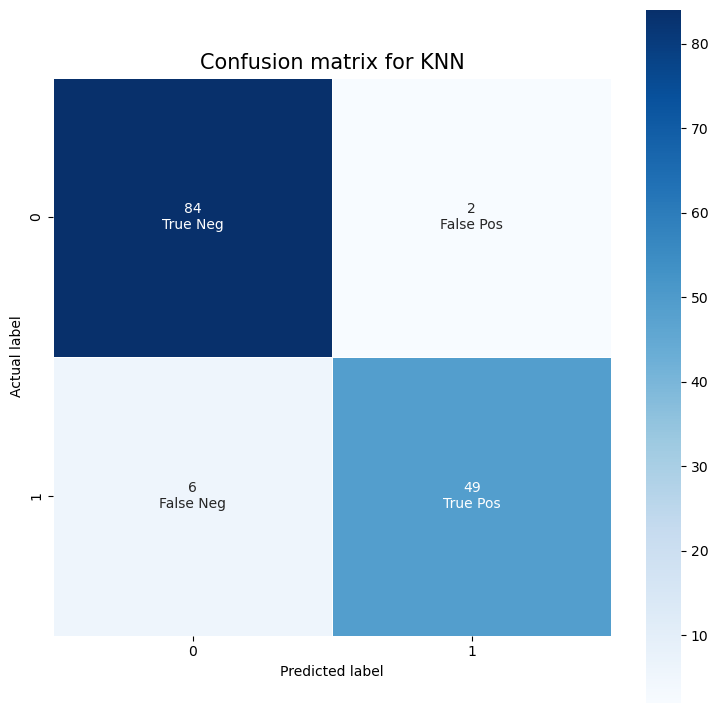

In [38]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
group_counts = ["{0:0.0f}\n{1}".format(value, name) for value, name in zip(confusion_matrix.flatten(), group_names)]
labels = np.asarray(group_counts).reshape(2, 2)

plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix, annot=labels, fmt='', linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion matrix for KNN'
plt.title(all_sample_title, size=15)

plt.show()

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

print("Precision score: " + str(precision))
print("Recall score: " + str(recall))
print("F1 score: " + str(f1))

Precision score: 0.9607843137254902
Recall score: 0.8909090909090909
F1 score: 0.9245283018867925


In [40]:
train_accuracies.append(accuracy_score(y_train, y_pred_train))
test_accuracies.append(accuracy_score(y_test, y_pred_test))

### Usporedba korištenih algoritama

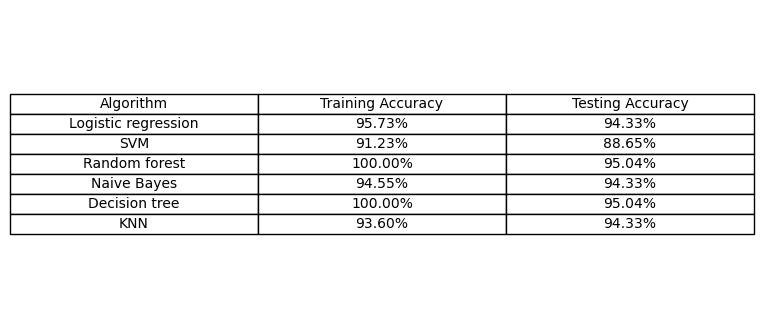

In [41]:
algorithm_names = ['Logistic regression', 'SVM', 'Random forest', 'Naive Bayes', 'Decision tree', 'KNN']

train_accuracy_percentage = [f'{acc*100:.2f}%' for acc in train_accuracies]
test_accuracy_percentage = [f'{acc*100:.2f}%' for acc in test_accuracies]

data = [algorithm_names, train_accuracy_percentage, test_accuracy_percentage]

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')

table = ax.table(cellText=list(map(list, zip(*data))), colLabels=['Algorithm', 'Training Accuracy', 'Testing Accuracy'],
                 cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()


 U znanstvenom članku SVM algoritam dao je najbolje rezultate po pitanju točnosti(accuracy). U mome slučaju najbolje su rezultate dali algoritmi Random forest(koji je dao druge najbolje rezultate u znanstvenom članku(96.5% testing acc)) i Decision tree, dok je SVM dao najgore rezultate od korištenih algoritama.  
U članku nisu navedeni korišteni hiperparametri stoga su svi algoritmi pozivani s defaultnim parametrima. Zbog toga i slučajnosti odabira skupova za testiranje i treniranje postoje razlike u dobivenim točnostima za korištene algoritme u članku i mojoj replikaciji.

 